


# General Overview
# Dataset Name: Employees Dataset
<!-- Description: 
    
This dataset captures information about job titles, total pay, benefits, and other attributes associated with employee salaries. It likely comes from a public sector or organizational salary record, making it useful for analyzing compensation patterns.
Key Columns and Descriptions

Represents the title of the employee's position.
Useful for grouping and analyzing pay by roles.
Questions like “Which job titles have the highest/lowest salaries?” can be answered. -->
# Questions to Explore
<!-- What are the average, median, and distribution of TotalPay(BasePay, TotalPay)?
Which job titles have the highest and lowest average salaries?
What percentage of total compensation comes from overtime or benefits?
Are there any job titles where benefits constitute a significant portion of total pay?
Are there specific years where salary or benefit trends deviate from the norm?
How do overtime pay and benefits vary by job title?
 -->


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\17086\Downloads\Salaries.csv')
data

In [144]:
# Display the first few rows of the dataset to understand its structur
data.columns
data.head(5)
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int32  
 10  Notes             148654 non-null  float64
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  float64
dtypes: float64(8), int32(1), int64(1), object(3)
memory usage: 19.3+ MB


Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

# data_cleaning

In [23]:
# # Drop columns with entirely null values
data_cleaned = data.drop(columns=['Notes', 'Status'],inplace=True)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


<ipython-input-193-07d45c478eda>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'].astype(int)


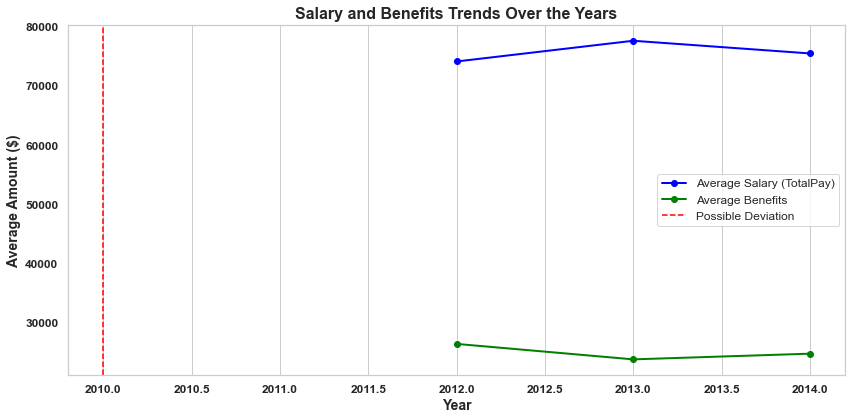

Years with Significant Salary/Benefits Deviations:
          TotalPay      Benefits     Deviation
Year                                          
2012  74113.262265  26439.966967  47673.295298
2013  77611.443142  23829.076572  53782.366570
2014  75471.836912  24789.601756  50682.235156


In [193]:
# Are there specific years where salary or benefit trends deviate from the norm?


# Group by Year and calculate average TotalPay and Benefits
yearly_trends = data.groupby('Year')[['TotalPay', 'Benefits']].mean()

# Plot trends over the years
plt.figure(figsize=(12, 6))

# Plot TotalPay trend
plt.plot(yearly_trends.index, yearly_trends['TotalPay'], marker='o', label='Average Salary (TotalPay)', color='blue', linewidth=2)

# Plot Benefits trend
plt.plot(yearly_trends.index, yearly_trends['Benefits'], marker='o', label='Average Benefits', color='green', linewidth=2)

# Highlight potential deviations
plt.axvline(x=2010, color='red', linestyle='--', label='Possible Deviation')  # Example year (adjust based on actual data)

# Add labels and title
plt.title('Salary and Benefits Trends Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Average Amount ($)', fontsize=14, fontweight='bold')

# Add grid, legend, and formatting
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

# Check for years with significant deviations
yearly_trends['Deviation'] = yearly_trends['TotalPay'] - yearly_trends['Benefits']
print("Years with Significant Salary/Benefits Deviations:")
print(yearly_trends[yearly_trends['Deviation'].abs() > yearly_trends['Deviation'].std()])


In [152]:


# Convert data types if necessary
# For example, convert the 'Year' column to an integer
data['Year'] = data['Year'].astype(int)


# Fill missing numeric values with 0 (e.g., salary components)
numeric_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
data[numeric_columns] = data[numeric_columns].fillna(0).inplace=True

data.isnull().sum()

In [33]:


# Save the cleaned data to a new CSV file
data.to_csv('cleaned_Salaries.csv', index=False)


   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisc

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  bool   
 4   OvertimePay       148654 non-null  bool   
 5   OtherPay          148654 non-null  bool   
 6   Benefits          148654 non-null  bool   
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int32  
 10  Notes             148654 non-null  float64
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  float64
dtypes: bool(4), float64(4), int32(1), int64(1), object(3)
memory usage: 15.4+ MB


In [157]:
data.drop_duplicates(inplace=True)

In [39]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [40]:
data.to_csv('cleaned_Salaries.csv', index=False)

In [59]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [62]:
data['TotalPay'].mean()

74768.321971703

In [77]:
data['Notes']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
148649    0.0
148650    0.0
148651    0.0
148652    0.0
148653    0.0
Name: Notes, Length: 148654, dtype: float64

In [194]:
# What is the range (minimum and maximum) of salaries in the dataset?

data['TotalPay'].min()
data['TotalPay'].max()

471952.64

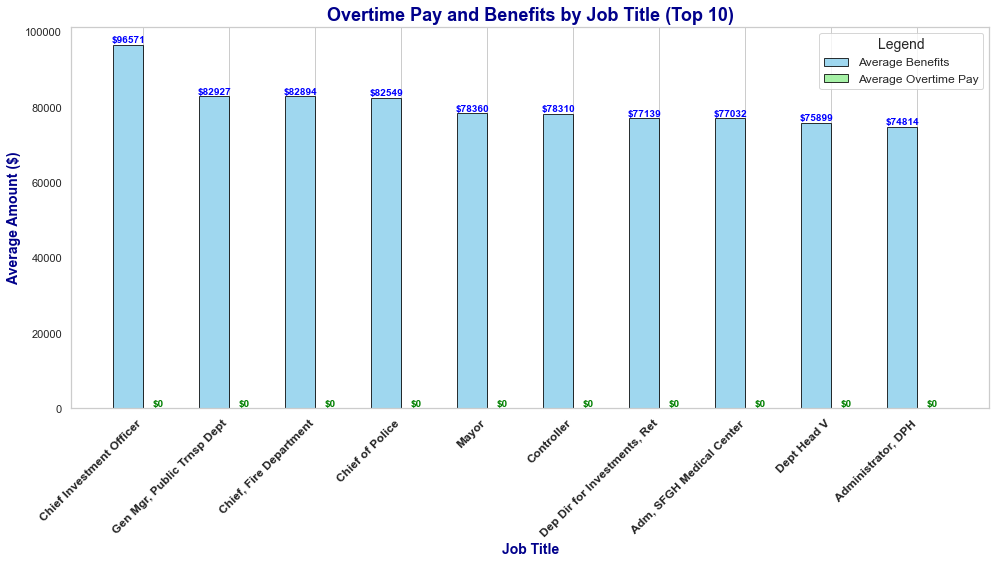

In [197]:
# How do overtime pay and benefits vary by job title?

# Group data by JobTitle and calculate the mean of OvertimePay and Benefits
job_title_stats = data.groupby('JobTitle')[['OvertimePay', 'Benefits']].mean()

# Sort data by Benefits to identify top job titles
job_title_stats = job_title_stats.sort_values(by='Benefits', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(14, 8))
bar_width = 0.35  # Width of the bars
x = range(len(job_title_stats.index))

# Plot Benefits
plt.bar(x, job_title_stats['Benefits'], bar_width, color='skyblue', label='Average Benefits', alpha=0.8, edgecolor='black')

# Plot Overtime Pay
plt.bar(
    [p + bar_width for p in x],
    job_title_stats['OvertimePay'],
    bar_width,
    color='lightgreen',
    label='Average Overtime Pay',
    alpha=0.8,
    edgecolor='black',
)

# Add labels to bars
for i, (benefit, overtime) in enumerate(zip(job_title_stats['Benefits'], job_title_stats['OvertimePay'])):
    plt.text(i, benefit + 500, f'${benefit:.0f}', ha='center', fontsize=10, fontweight='bold', color='blue')
    plt.text(i + bar_width, overtime + 500, f'${overtime:.0f}', ha='center', fontsize=10, fontweight='bold', color='green')

# Title and labels
plt.title('Overtime Pay and Benefits by Job Title (Top 10)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Job Title', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Average Amount ($)', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks([p + bar_width / 2 for p in x], job_title_stats.index, rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.legend(fontsize=12, loc='upper right', title='Legend', title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add tight layout
plt.tight_layout()

# Show the plot
plt.show()




In [160]:

# What is the average salary across all employees?


data.groupby('EmployeeName')['TotalPay'].mean()

EmployeeName
A BERNARD FATOOH         20039.910
A Bernard  Fatooh        23923.620
A Bernard Fatooh         21280.770
A ELIZABETH MARCHASIN    26282.860
A JAMIL NIAZI            87496.210
                           ...    
Zun Jin Zhang He         57820.370
Zuna Luu                 52518.080
Zuna T Luu               56121.675
Zuri  Jones              71986.900
Zuri Jones               76628.030
Name: TotalPay, Length: 110811, dtype: float64

In [161]:
data.groupby('EmployeeName')['TotalPay'].max()
data.groupby('EmployeeName')['TotalPay'].min()

EmployeeName
A BERNARD FATOOH         20039.91
A Bernard  Fatooh        23923.62
A Bernard Fatooh         18500.19
A ELIZABETH MARCHASIN    26282.86
A JAMIL NIAZI            87496.21
                           ...   
Zun Jin Zhang He         56763.44
Zuna Luu                 52518.08
Zuna T Luu               56087.91
Zuri  Jones              71986.90
Zuri Jones               66667.54
Name: TotalPay, Length: 110811, dtype: float64

In [79]:
# Steps to Analyze Demographics and Categories
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

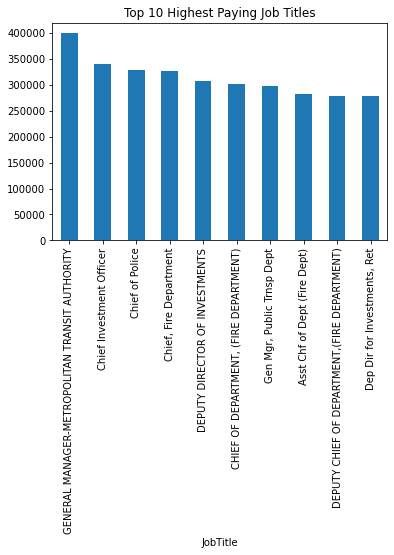

In [82]:
# Job Title Analysis:

data.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Highest Paying Job Titles')
plt.show()


In [163]:
highest_paying_jobs = jobTitle_TotalPay.head(5).sort_values(ascending=False)


In [114]:
highest_paying_jobs 

JobTitle
Commissioner 16.700c, No Pay    25.76
IS Technician Assistant          0.00
Drug Court Coordinator           0.00
Not provided                     0.00
Public Safety Comm Tech          0.00
Name: TotalPay, dtype: float64

In [115]:
lowest_paying_jobs = job_title_salary.tail(5).sort_values(ascending=True)

In [116]:
lowest_paying_jobs 

JobTitle
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
Chief, Fire Department                            325971.683333
Chief of Police                                   329183.646667
Chief Investment Officer                          339653.700000
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Name: TotalPay, dtype: float64

# Visualization:




In [119]:
#  Create a bar chart to visualize the differences in average salaries .for each job title

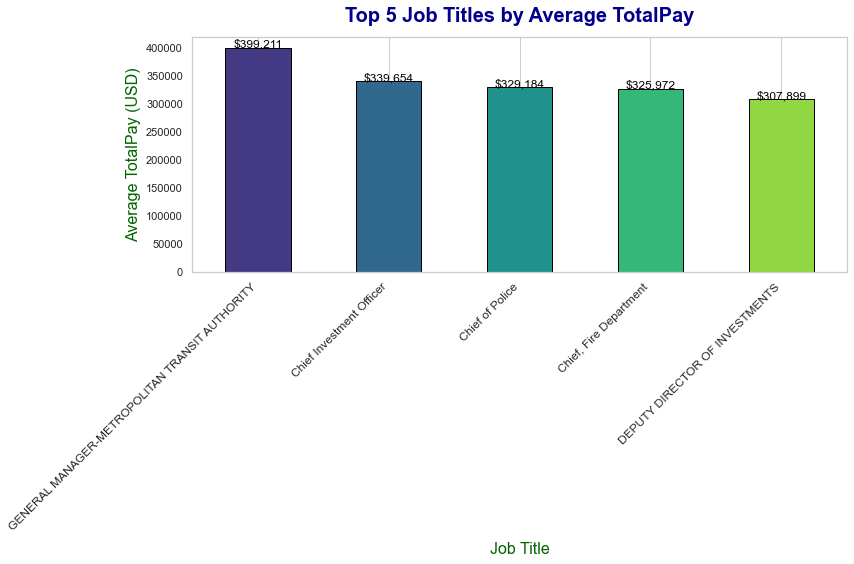

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# Prepare data for plotting
top_5_jobs = data.groupby('JobTitle')['TotalPay'].mean().nlargest(5)

# Create a figure for the bar chart
plt.figure(figsize=(12, 8))

# Plot the bar chart with custom colors and styling
bars = top_1_jobs.plot(
    kind='bar',
    color=sns.color_palette('viridis', len(top_5_jobs)),
    edgecolor='black'
)

# Add titles and labels with enhanced styling
plt.title('Top 5 Job Titles by Average TotalPay', fontsize=20, fontweight='bold', color='darkblue', pad=15)
plt.xlabel('Job Title', fontsize=16, labelpad=10, color='darkgreen')
plt.ylabel('Average TotalPay (USD)', fontsize=16, labelpad=5, color='darkgreen')

# Customize the x-axis ticks for better readability
plt.xticks(rotation=45, fontsize=12, ha='right')

# Annotate bar heights
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        bar.get_height() + 1000,  # Height of the bar + some padding
        f"${bar.get_height():,.0f}",  # Format the value with commas and dollar sign
        ha='center', fontsize=12, color='black'
    )

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# What percentage of total compensation comes from overtime or benefits

import pandas as pd
import matplotlib.pyplot as plt




# Calculate percentages
data['OvertimePercentage'] = (data['OvertimePay'] / data['TotalPayBenefits']) * 100
data['BenefitsPercentage'] = (data['Benefits'] / data['TotalPayBenefits']) * 100

# Average percentages across all employees
avg_overtime_percentage = data['OvertimePercentage'].mean()
avg_benefits_percentage = data['BenefitsPercentage'].mean()

# Print results
print(f"Average Overtime Contribution to Total Compensation: {avg_overtime_percentage:.2f}%")
print(f"Average Benefits Contribution to Total Compensation: {avg_benefits_percentage:.2f}%")

# Visualize the percentages
categories = ['Overtime', 'Benefits']
percentages = [avg_overtime_percentage, avg_benefits_percentage]

# Beautify the visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=['#00BFFF', '#3CB371'], edgecolor='black', linewidth=1.5)

# Add annotations
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 1, 
        f"{bar.get_height():.2f}%", 
        ha='center', 
        fontsize=12, 
        fontweight='bold'
    )

# Customize chart
plt.title('Average Contribution to Total Compensation (%)', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.xlabel('Categories', fontsize=14, fontweight='bold')
plt.ylim(0, max(percentages) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, fontweight='bold', color='darkblue')
plt.yticks(fontsize=12, fontweight='bold', color='darkblue')

# Display chart
plt.tight_layout()
plt.show()

